# Importing libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing

# Get the data

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/heart-disease-uci/heart.csv


In [3]:
filep = "/kaggle/input/heart-disease-uci/heart.csv"
df = pd.read_csv(filep)
np.random.seed(42)

In [4]:
#rows and columns
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Description per column:

    -age
    -sex
    -cp: chest pain type (1, 2, 3, 4)
    -trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    -chol: serum cholestoral in mg/dl
    -fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    -restecg: resting electrocardiographic results (0, 1, 2)
    -thalach: maximum heart rate achieved
    -exang: exercise induced angina (1 = yes; 0 = no)
    -oldpeak = ST depression induced by exercise relative to rest
    -slope: the slope of the peak exercise ST segment (1, 2, 3)
    -ca: number of major vessels colored by flourosopy (0, 1, 2, 3)
    -thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
    -target: diagnosis of heart disease (0: < 50% diameter narrowing, 1: > 50% diameter narrowing)
    
Descriptions retrieved from https://archive.ics.uci.edu/ml/datasets/heart+Disease

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#checking for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

> No missing values on the data set

# Data Visualization
> A couple quick kde plots to see the relationship between "age" and "chol" to "target

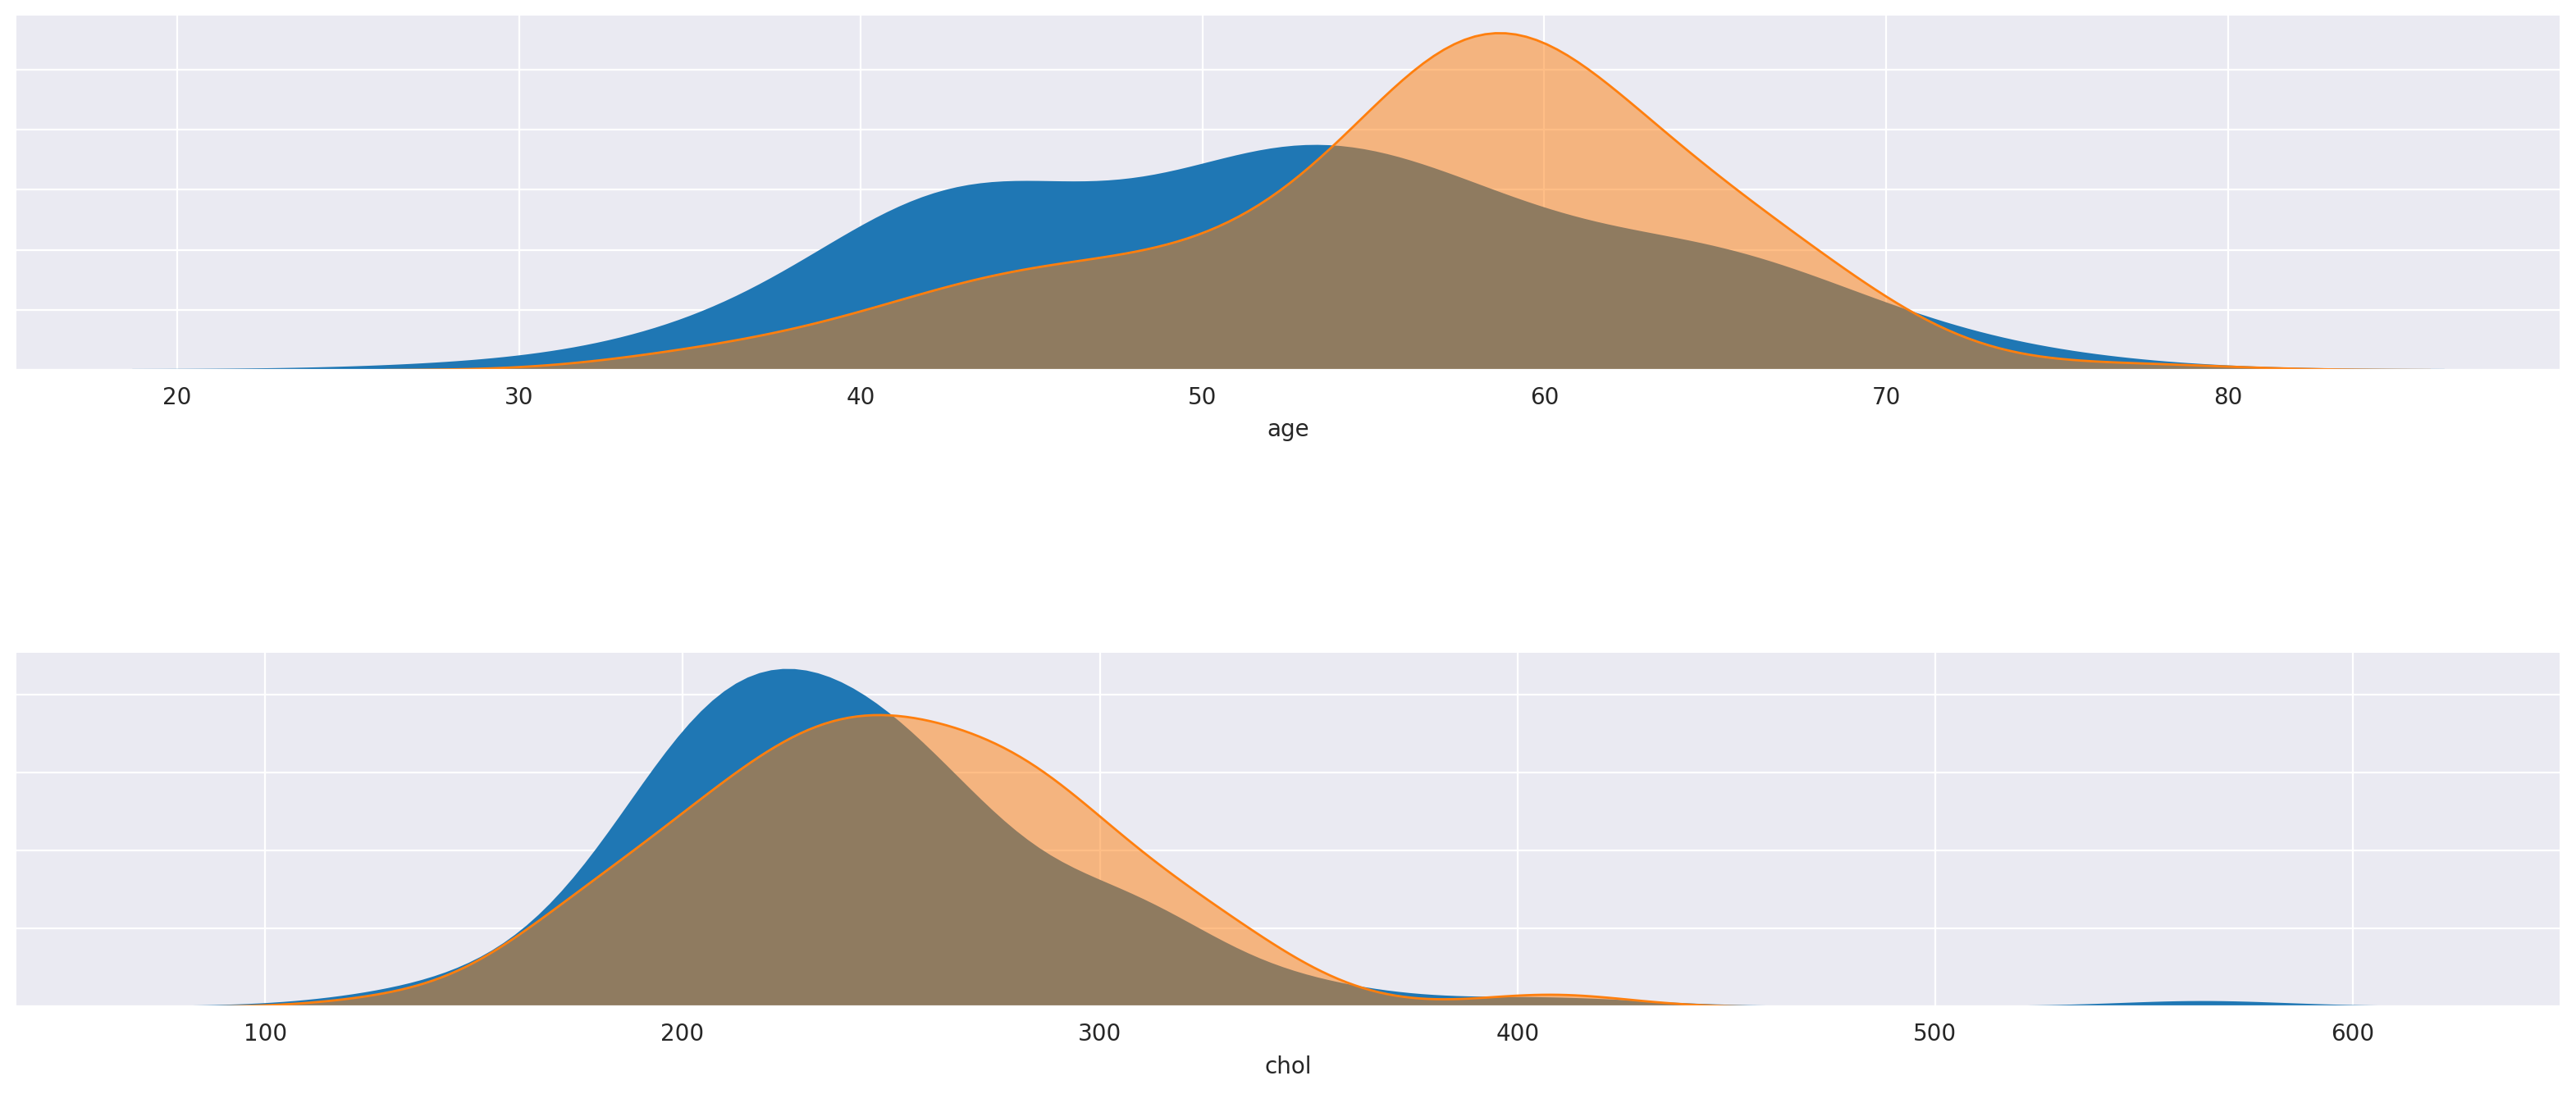

In [7]:
plt.rcParams['figure.dpi'] = 200
sns.set_style('darkgrid')
fig=plt.figure(figsize=(20,8),facecolor='white')
ax=[None for i in range(2)]
gs=fig.add_gridspec(2,1)
gs.update(wspace=0, hspace=0.8)

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[1,0])

sns.kdeplot(data=df[df.target==1],x='age',ax=ax[0],shade=True,alpha=1)
sns.kdeplot(data=df[df.target==0],x='age',ax=ax[0],shade=True,alpha=0.5)
sns.kdeplot(data=df[df.target==1],x='chol',ax=ax[1],shade=True,alpha=1)
sns.kdeplot(data=df[df.target==0],x='chol',ax=ax[1],shade=True,alpha=0.5)

for i in range(2):
    ax[i].set_yticklabels('')
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)

**Countplots**

<AxesSubplot:xlabel='age', ylabel='count'>

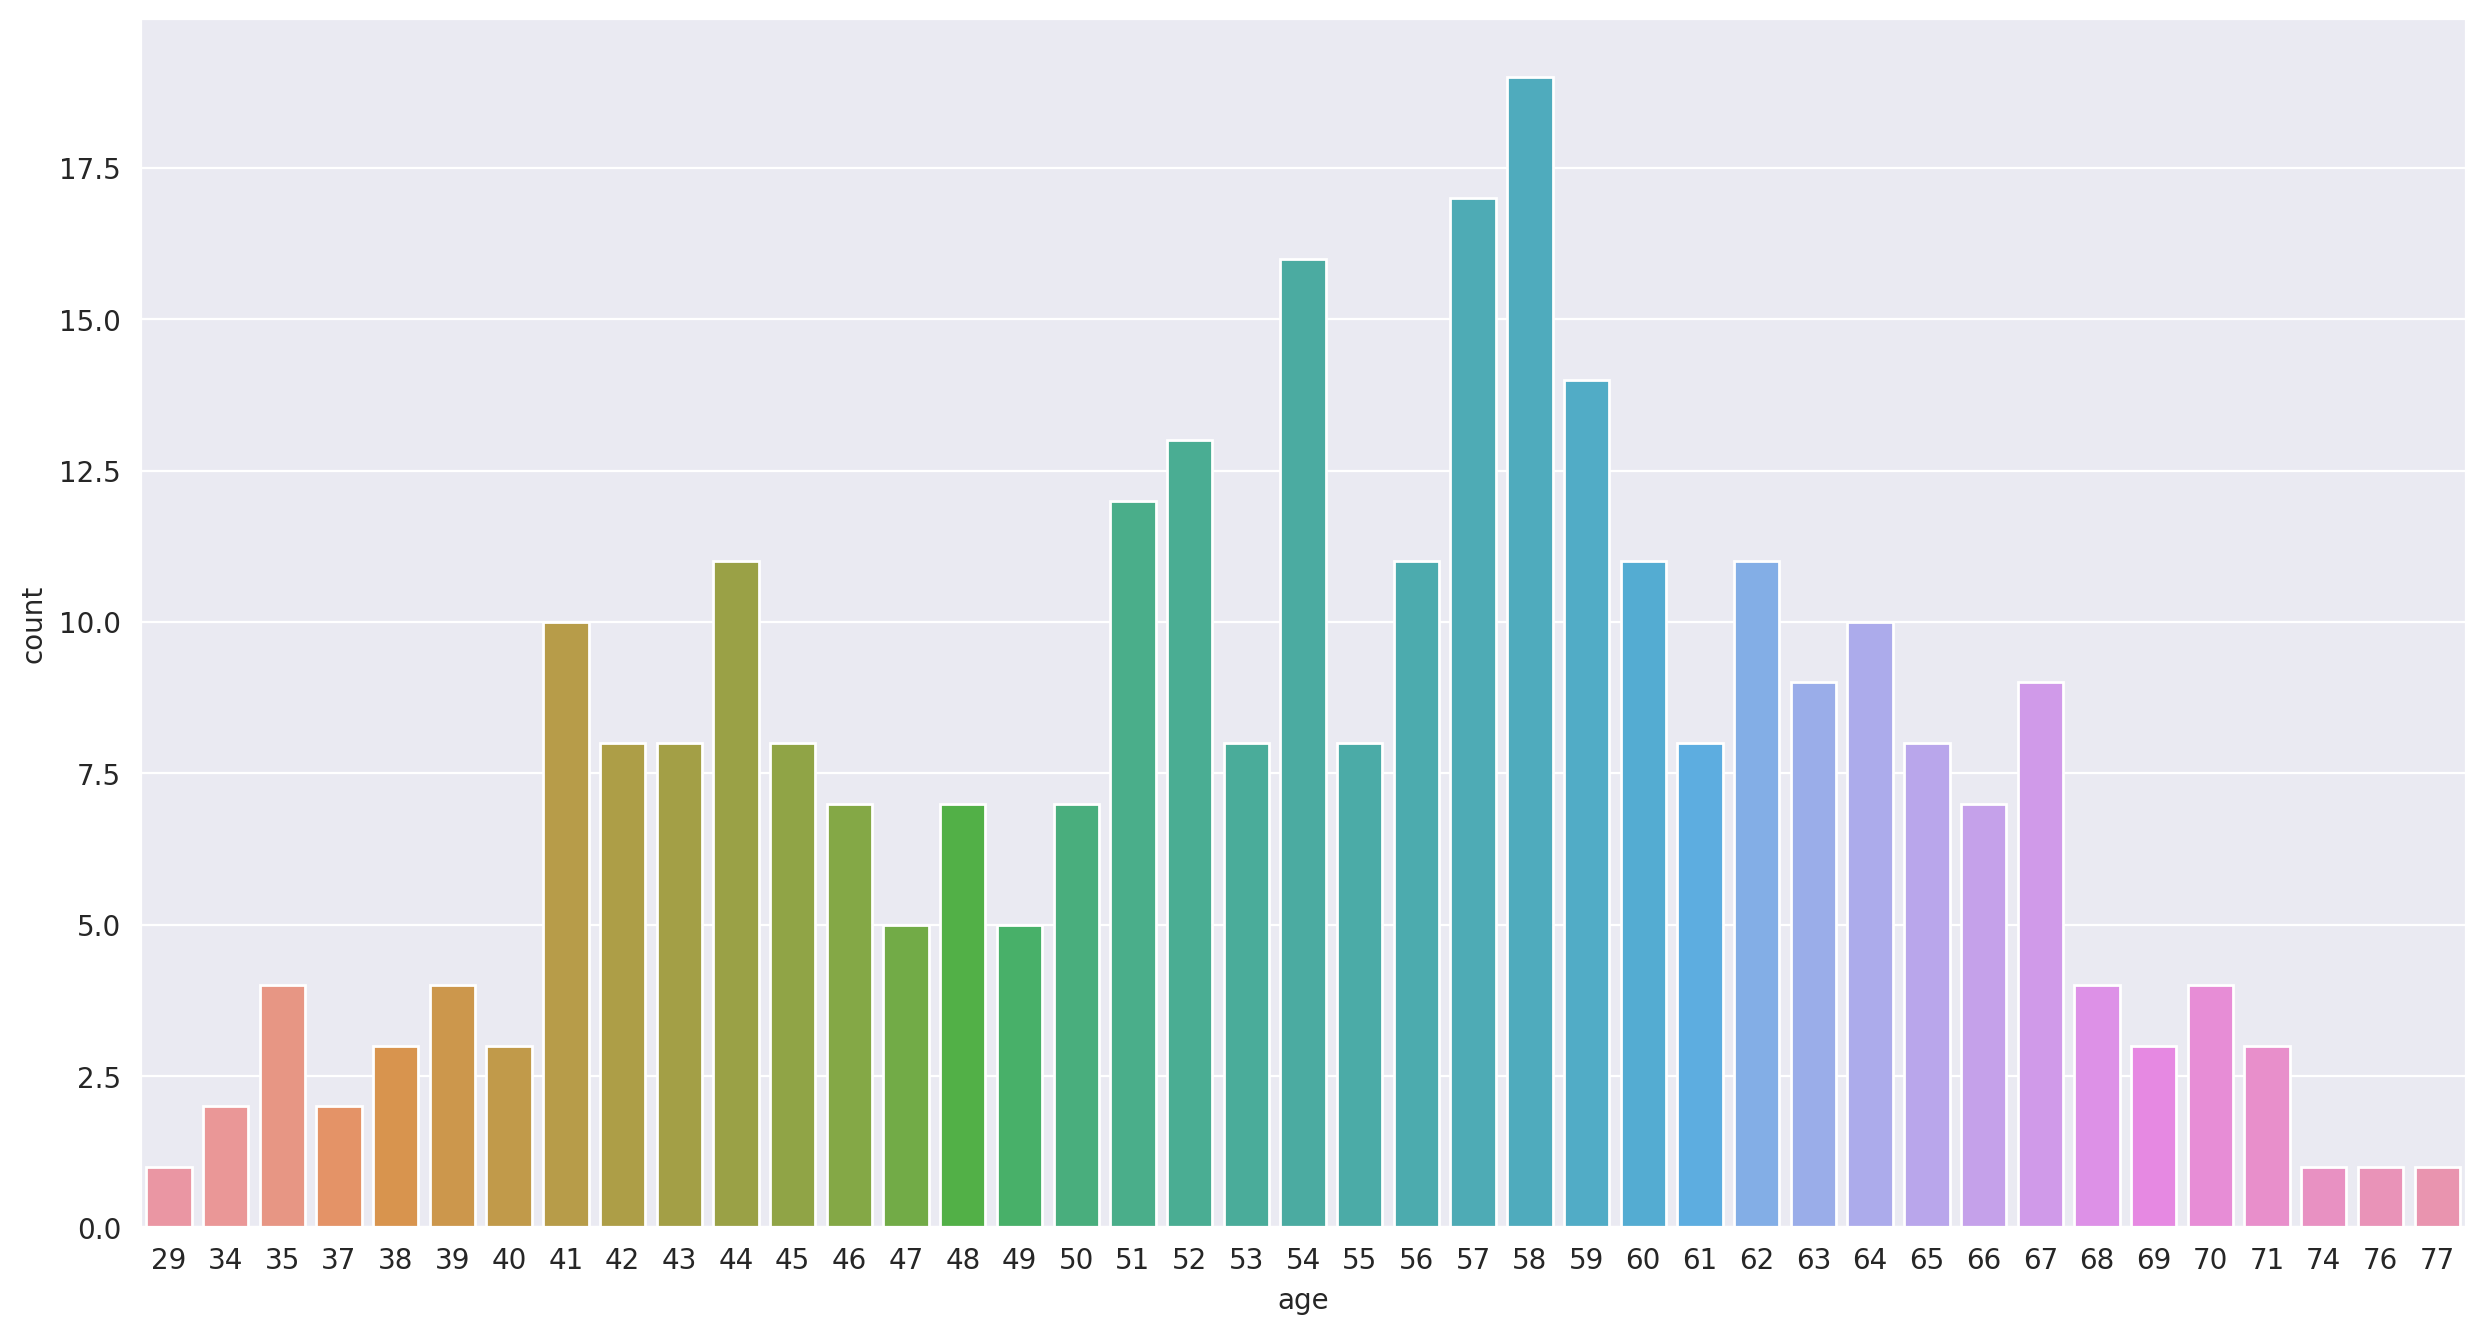

In [8]:
plt.figure(figsize=(15,8))
sns.countplot(df["age"])

<AxesSubplot:xlabel='target', ylabel='count'>

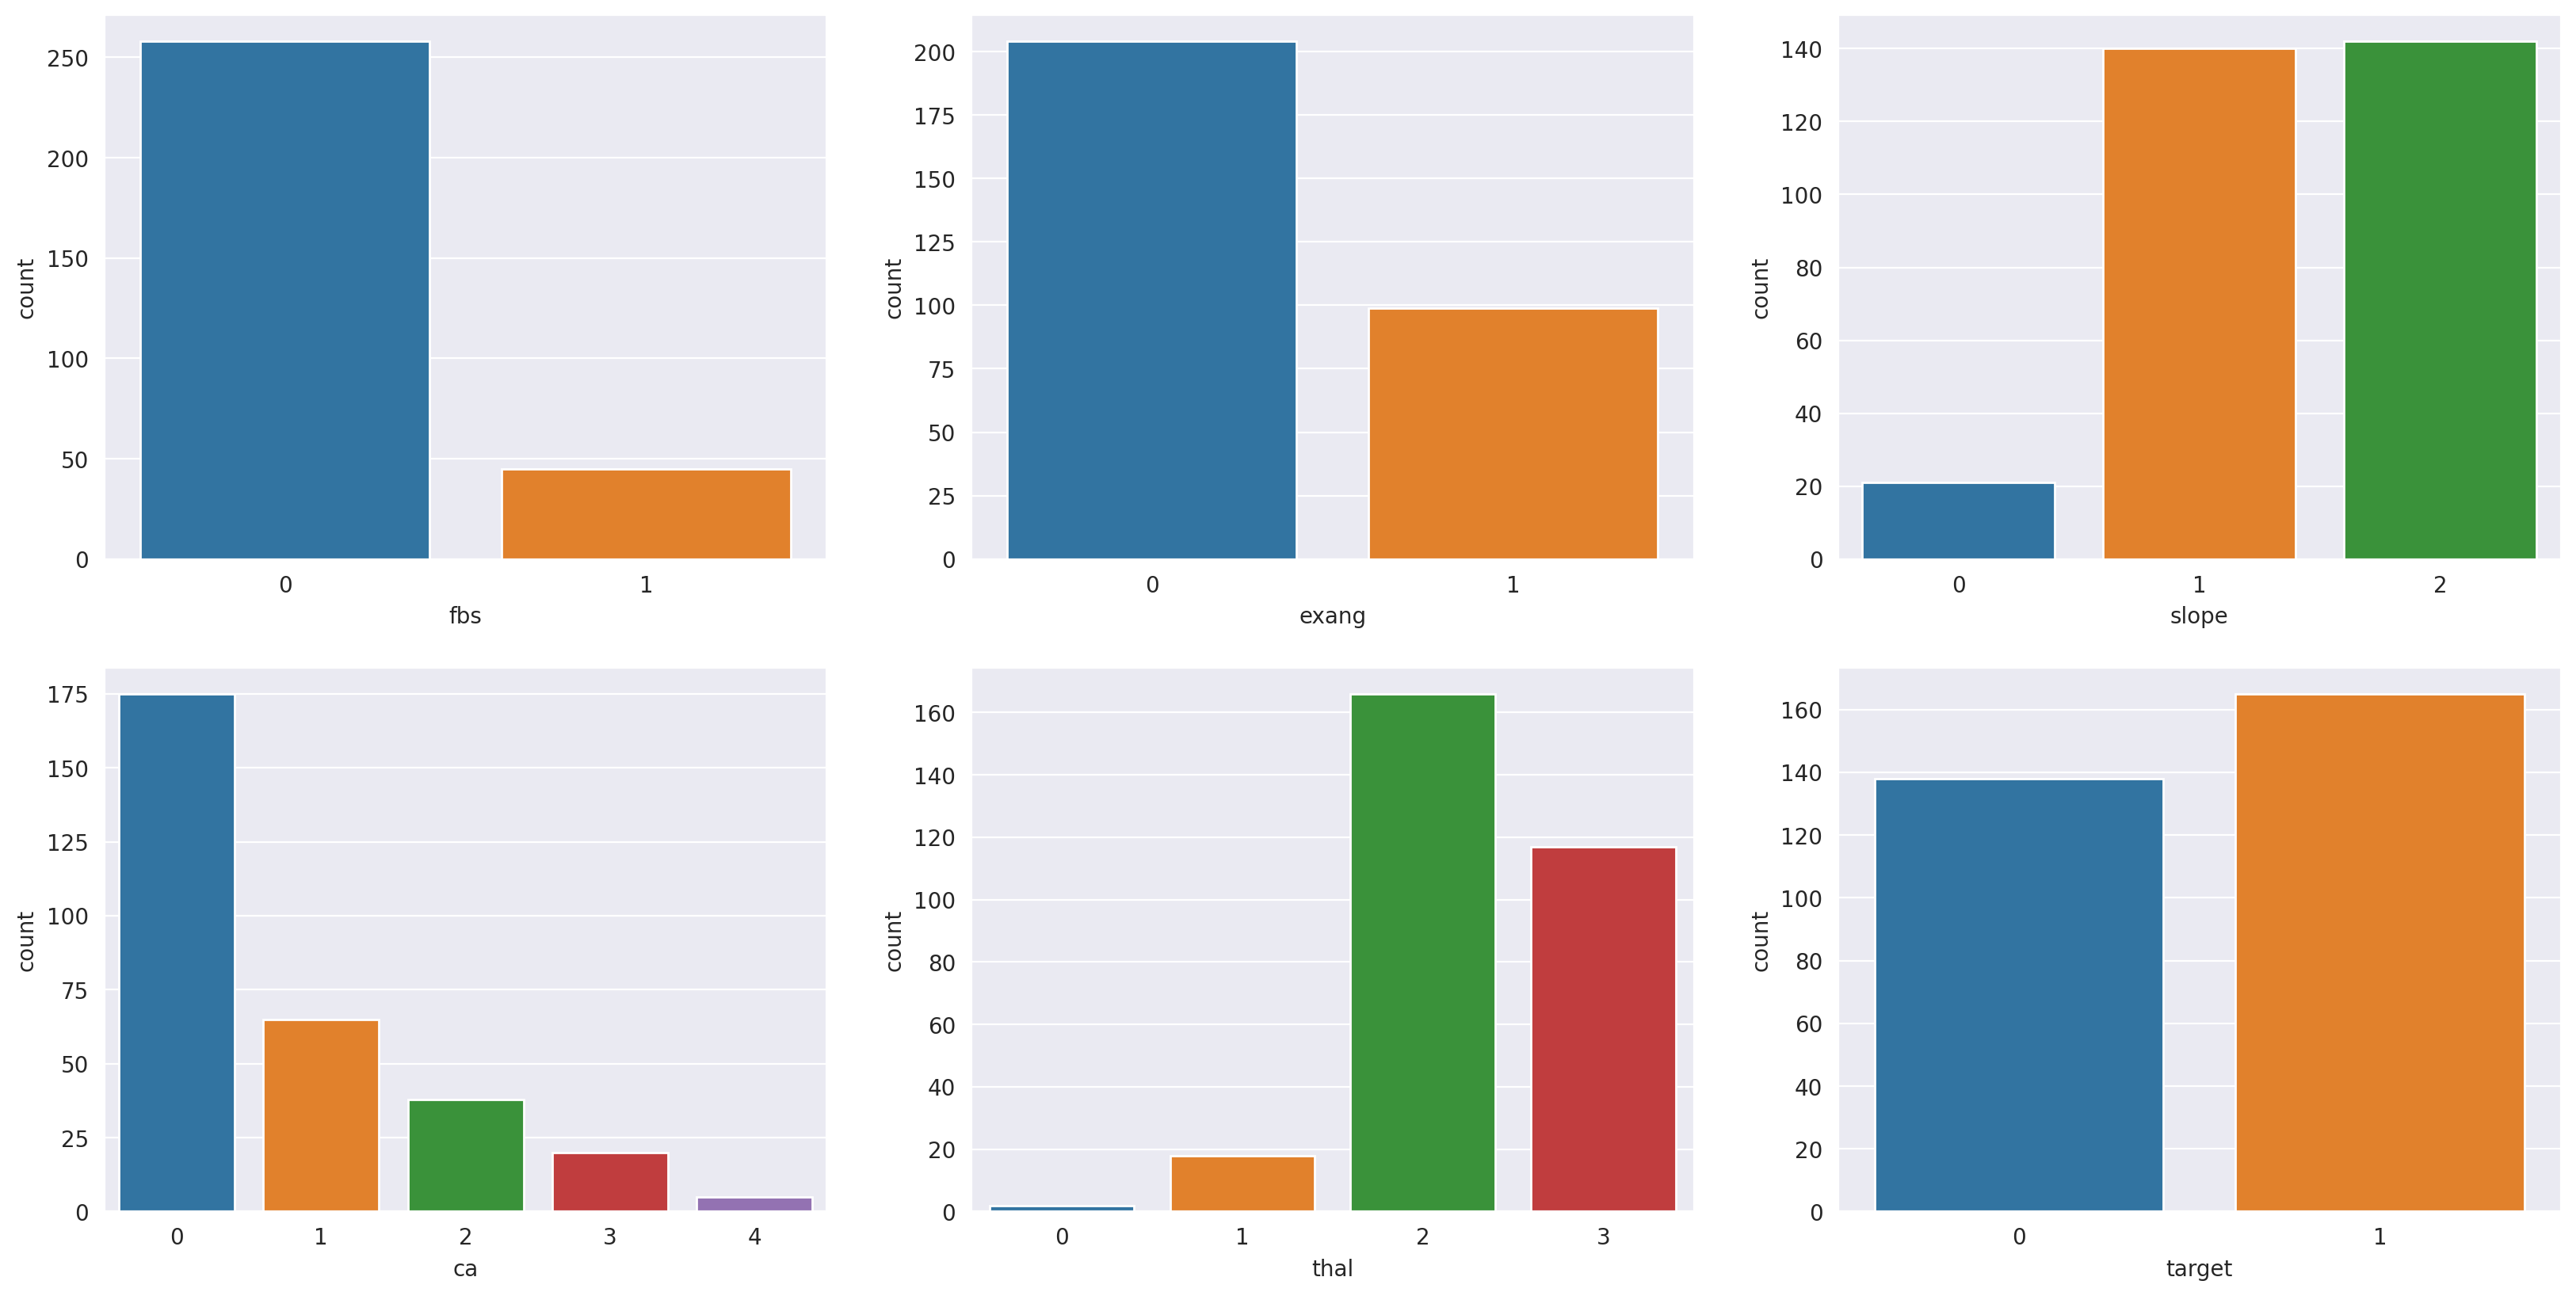

In [9]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.countplot(df['fbs'])

plt.subplot(2,3,2)
sns.countplot(df['exang'])

plt.subplot(2,3,3)
sns.countplot(df['slope'])

plt.subplot(2,3,4)
sns.countplot(df['ca'])

plt.subplot(2,3,5)
sns.countplot(df['thal'])

plt.subplot(2,3,6)
sns.countplot(df['target'])


**Scatterplots**

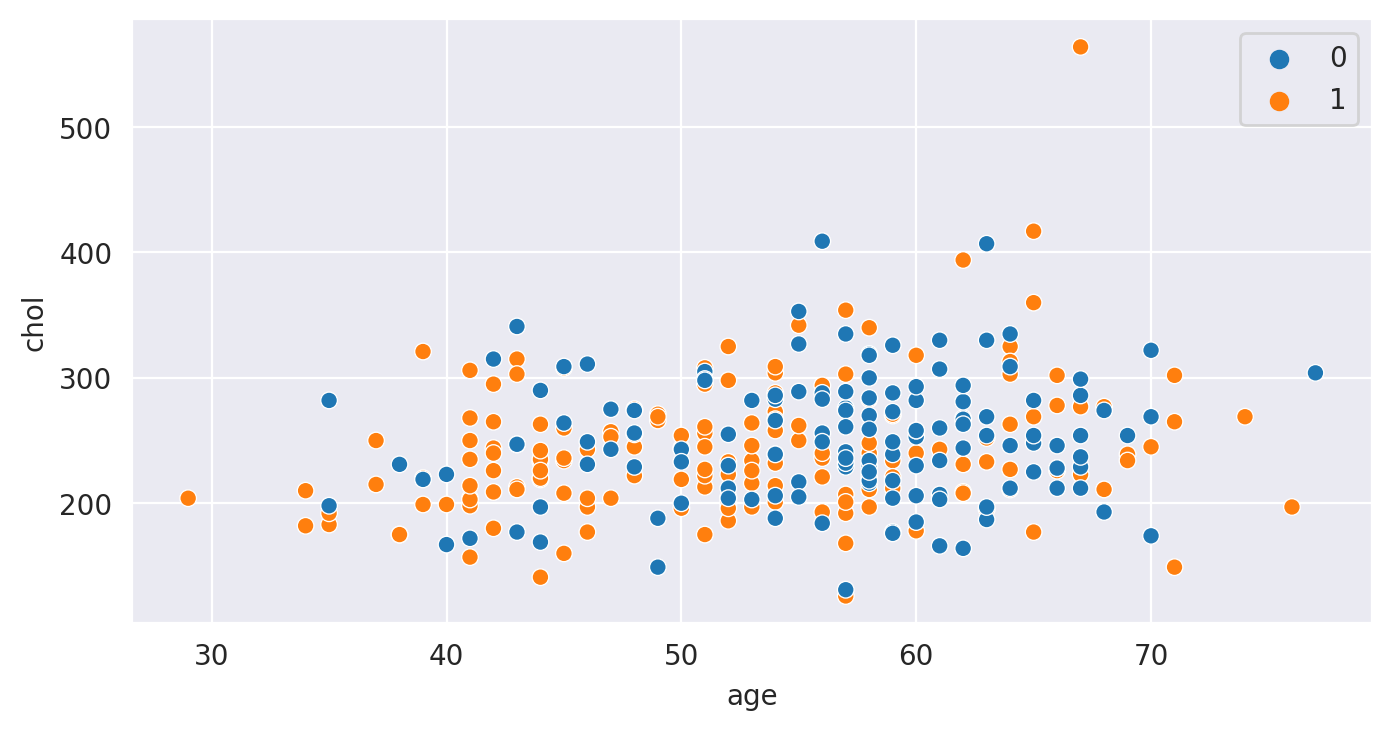

In [10]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df["age"], y=df["chol"], hue=df["target"])
plt.legend()

<Figure size 2800x1200 with 0 Axes>

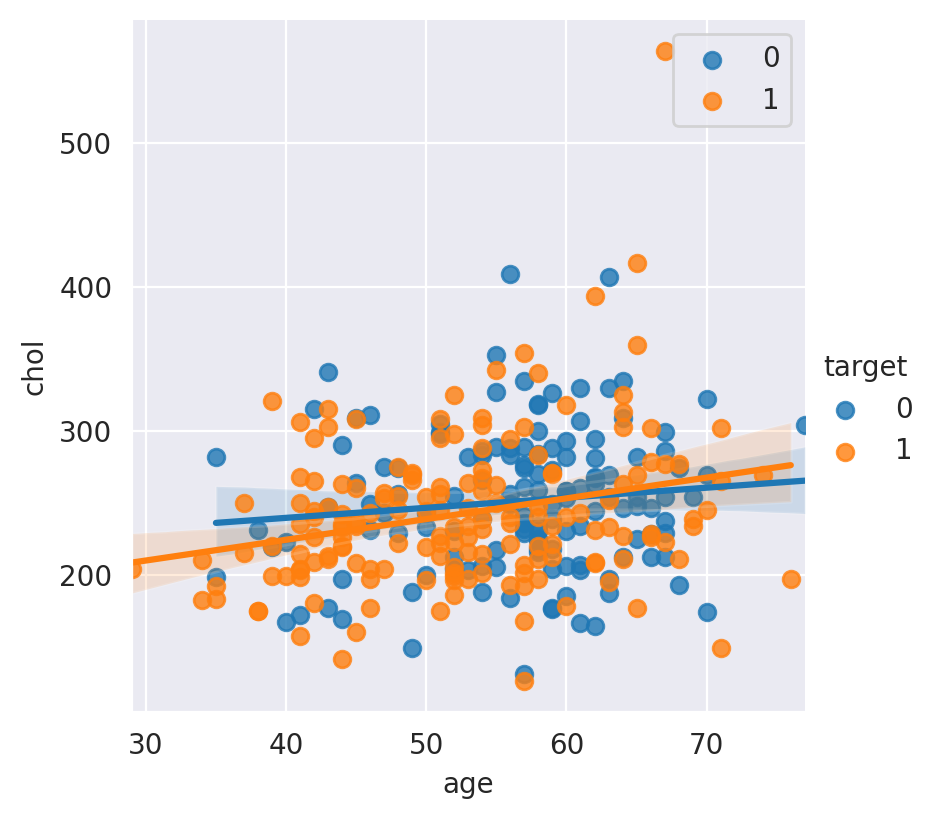

In [11]:
plt.figure(figsize=(14, 6))
sns.lmplot(x="age", y="chol", hue="target", data=df,size=4, aspect=1)
plt.legend()

**Barplots**

<AxesSubplot:xlabel='target', ylabel='age'>

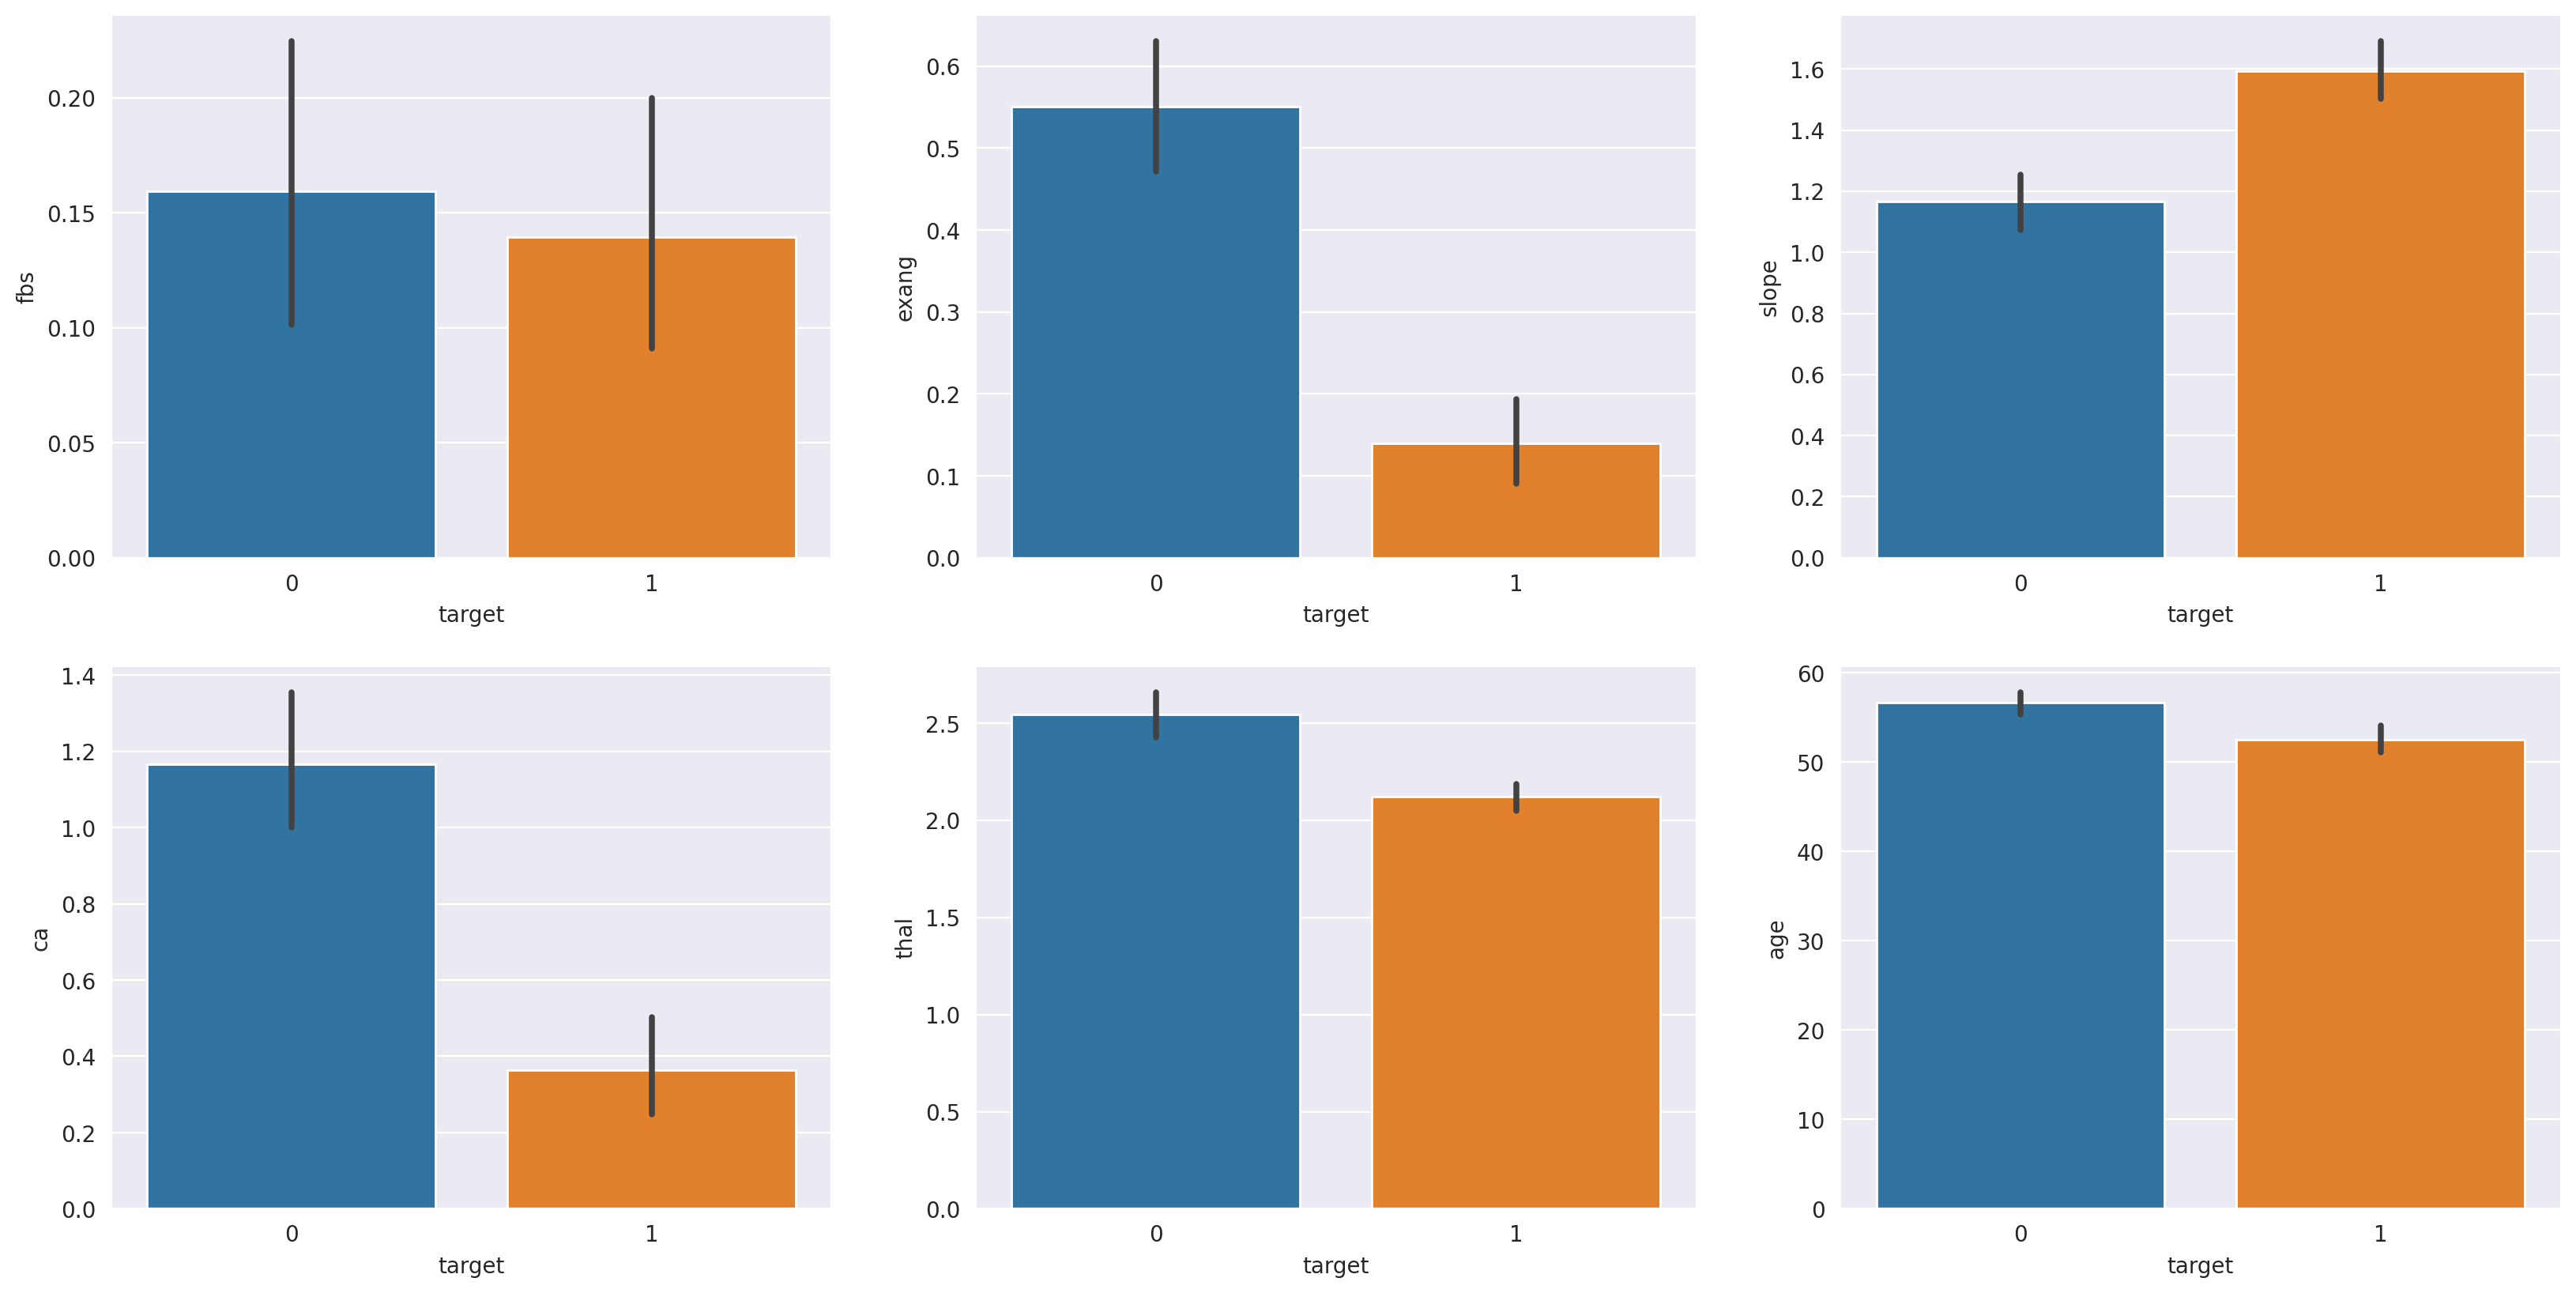

In [12]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.barplot(x=df["target"], y=df["fbs"] )

plt.subplot(2,3,2)
sns.barplot(x=df["target"], y=df['exang'])

plt.subplot(2,3,3)
sns.barplot(x=df["target"], y=df['slope'])

plt.subplot(2,3,4)
sns.barplot(x=df["target"], y=df['ca'])

plt.subplot(2,3,5)
sns.barplot(x=df["target"], y=df['thal'])

plt.subplot(2,3,6)
sns.barplot(x=df["target"], y=df['age'])

<AxesSubplot:xlabel='trestbps', ylabel='chol'>

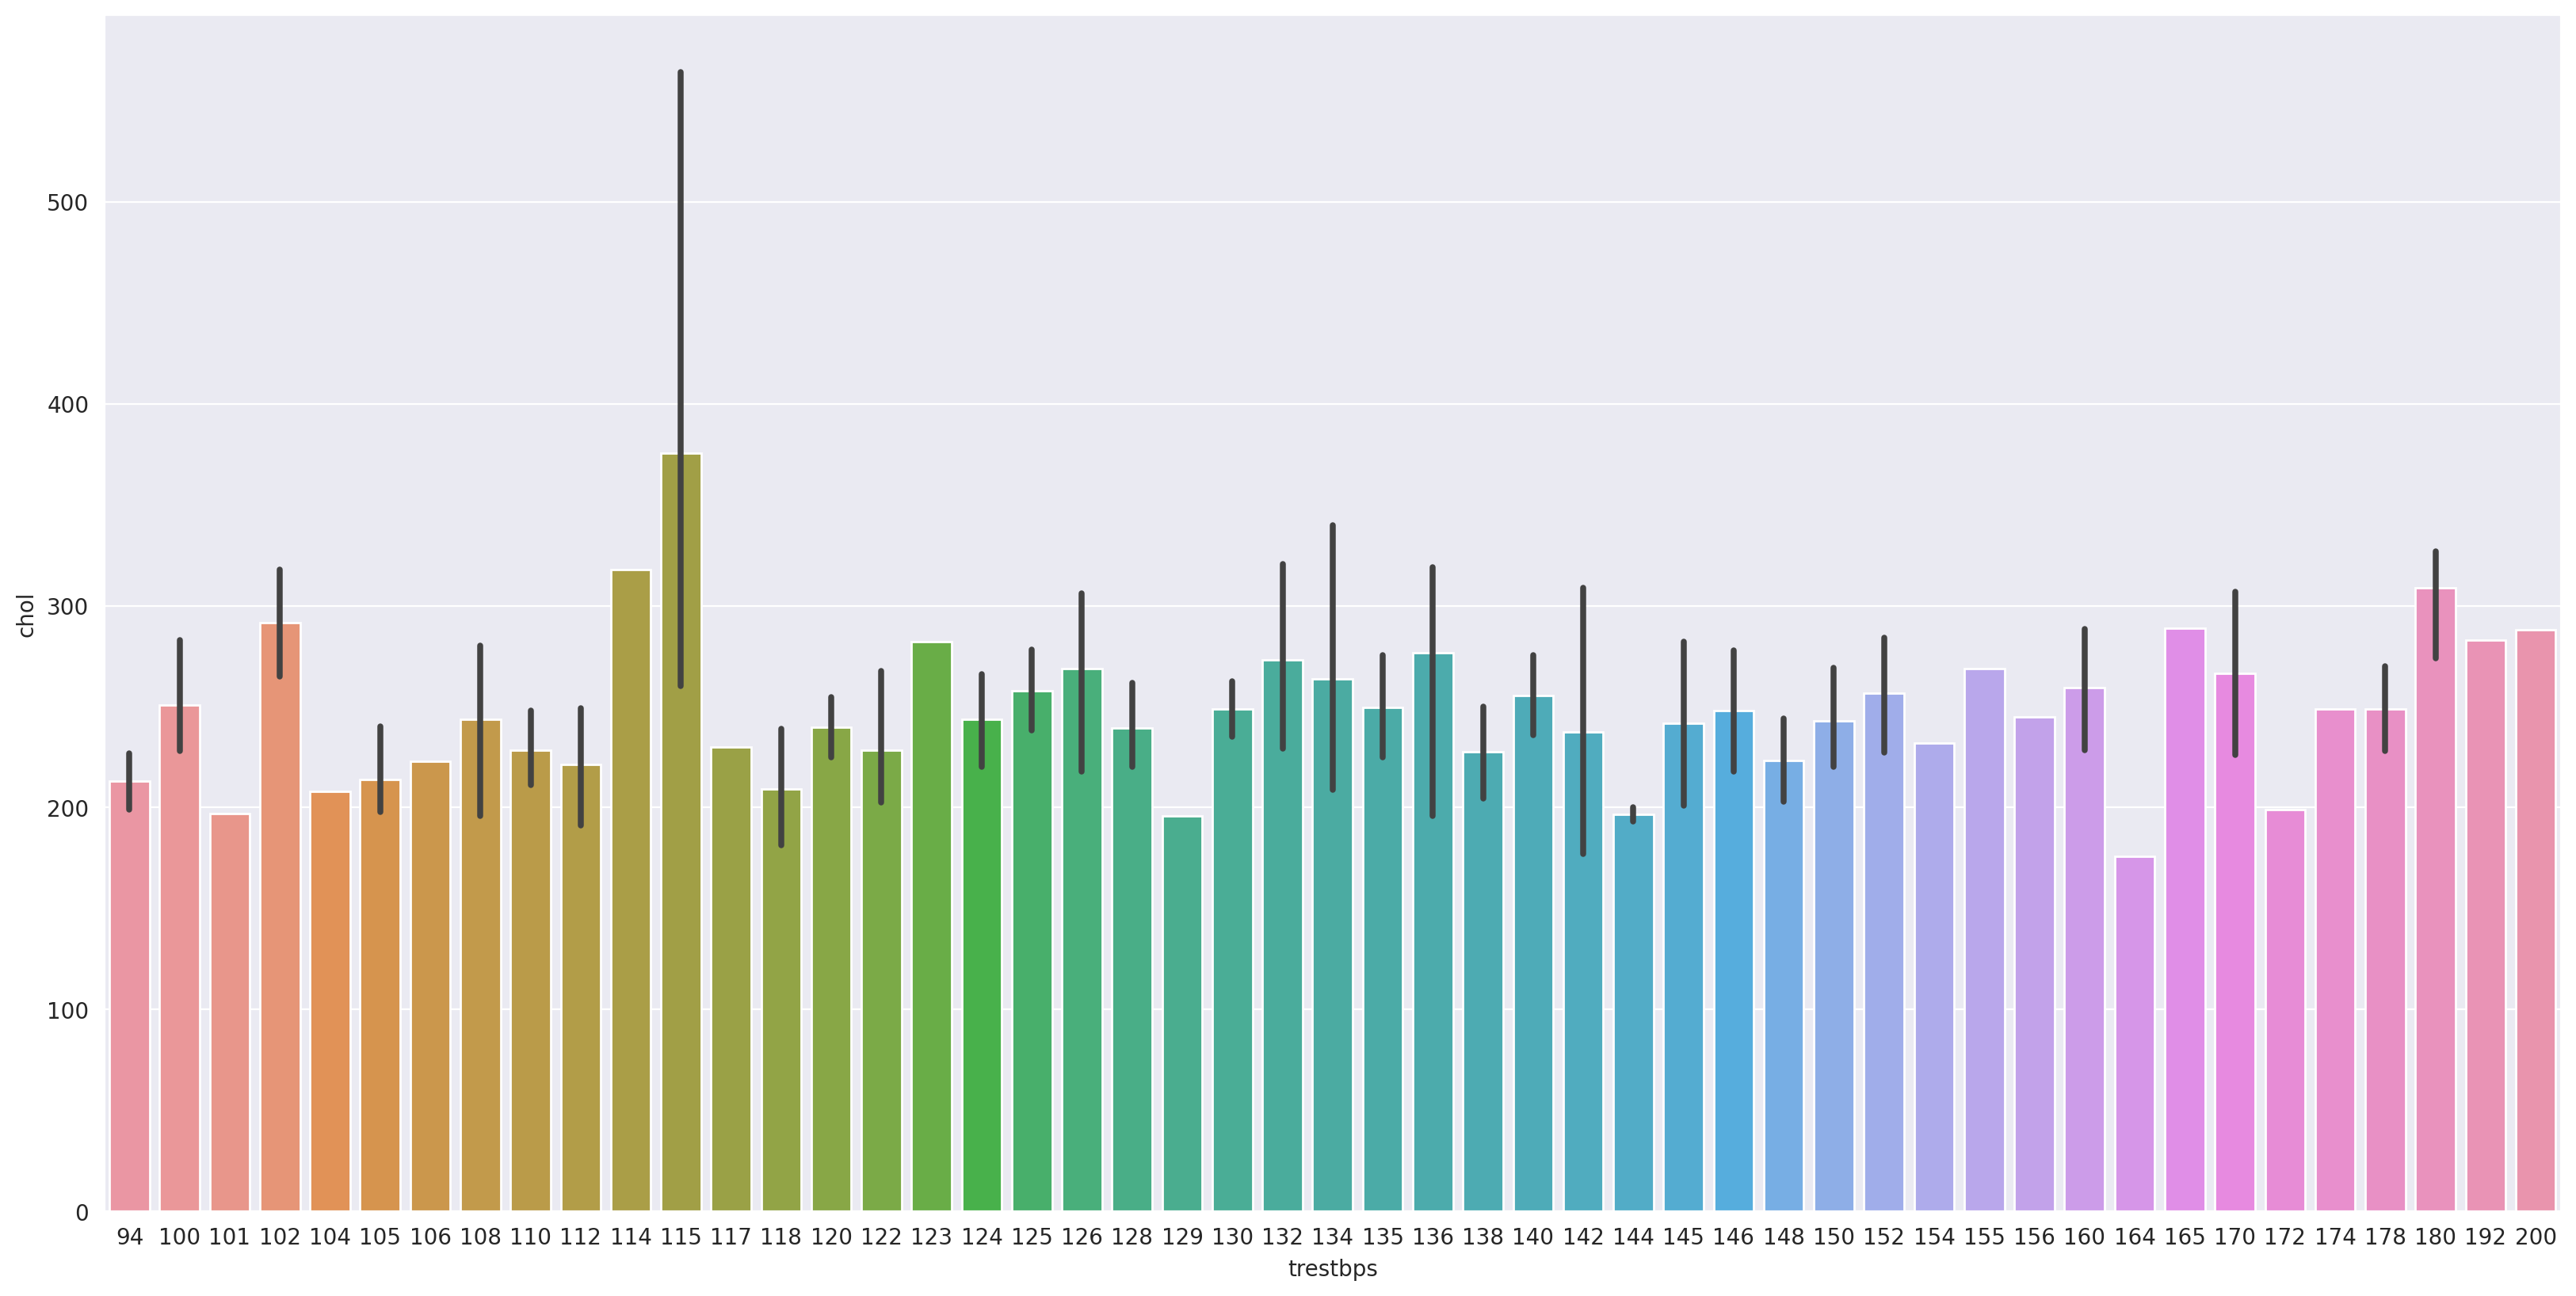

In [13]:
plt.figure(figsize=(20,10))
sns.barplot(x="trestbps", y="chol", data=df)

**Distplots**

<AxesSubplot:xlabel='trestbps', ylabel='Density'>

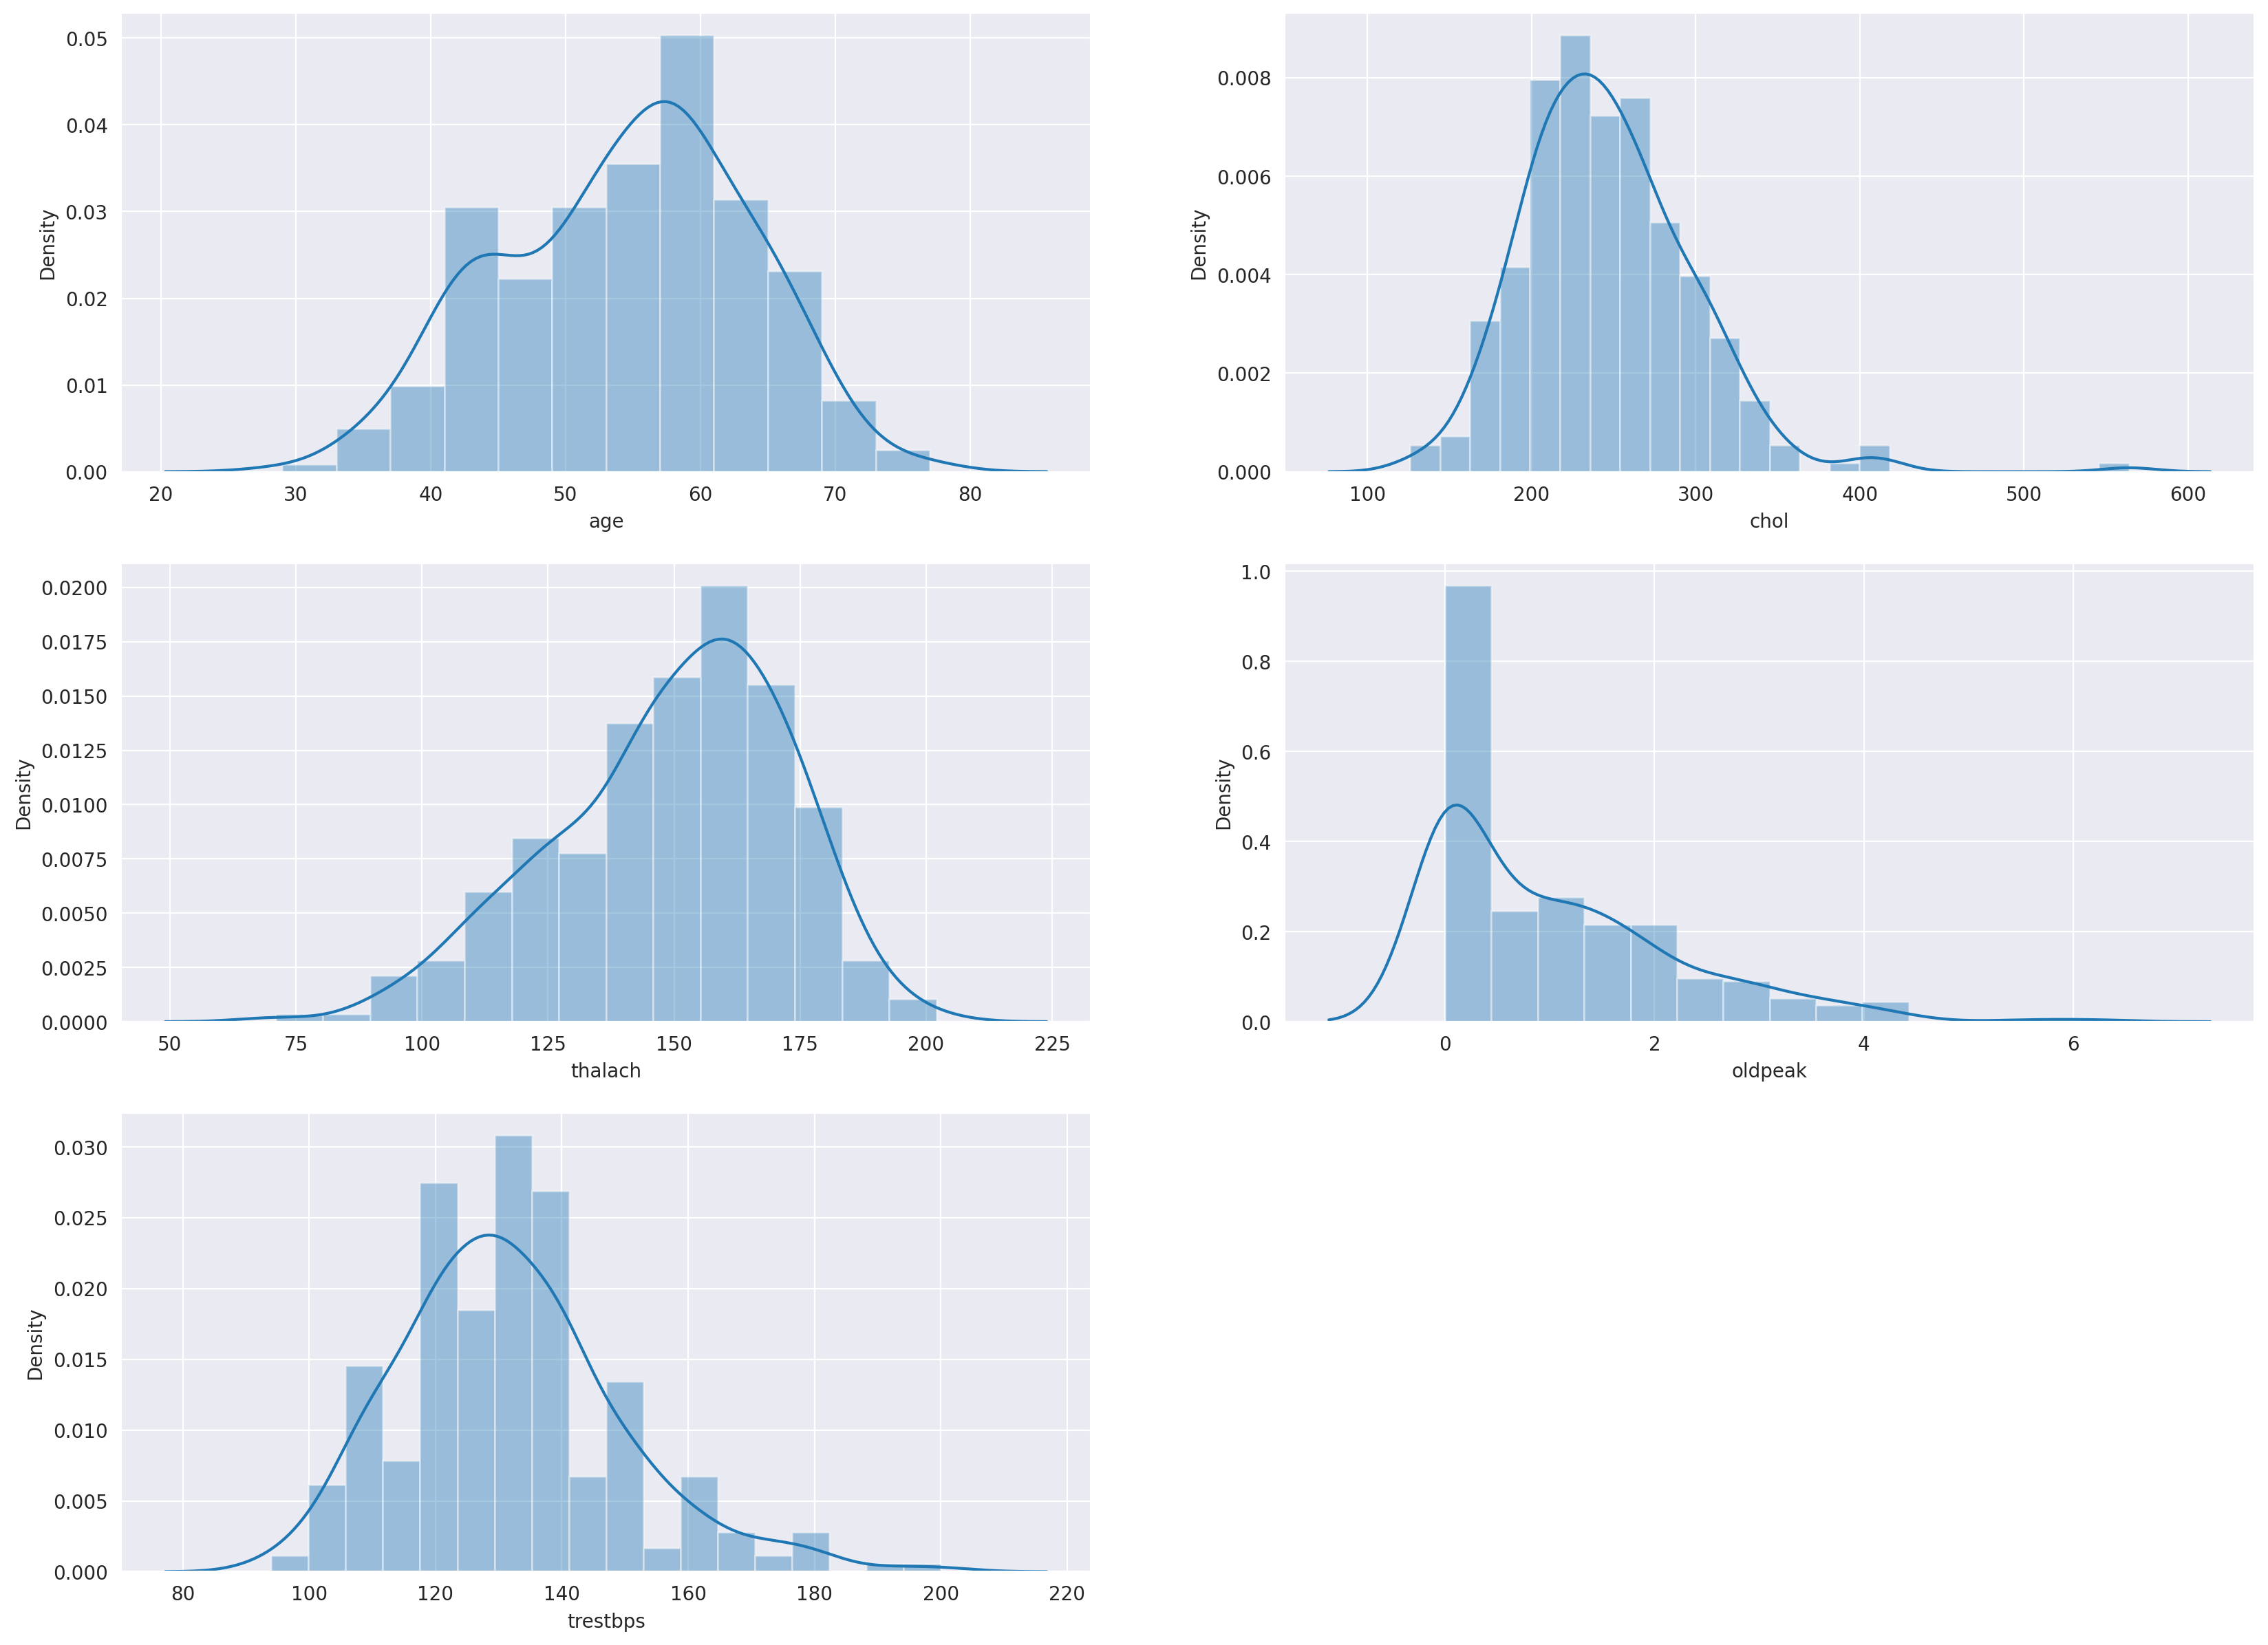

In [14]:
plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
sns.distplot(df['age'])

plt.subplot(3,2,2)
sns.distplot(df['chol'])

plt.subplot(3,2,3)
sns.distplot(df['thalach'])

plt.subplot(3,2,4)
sns.distplot(df['oldpeak'])

plt.subplot(3,2,5)
sns.distplot(df['trestbps'])

**Pairplot**

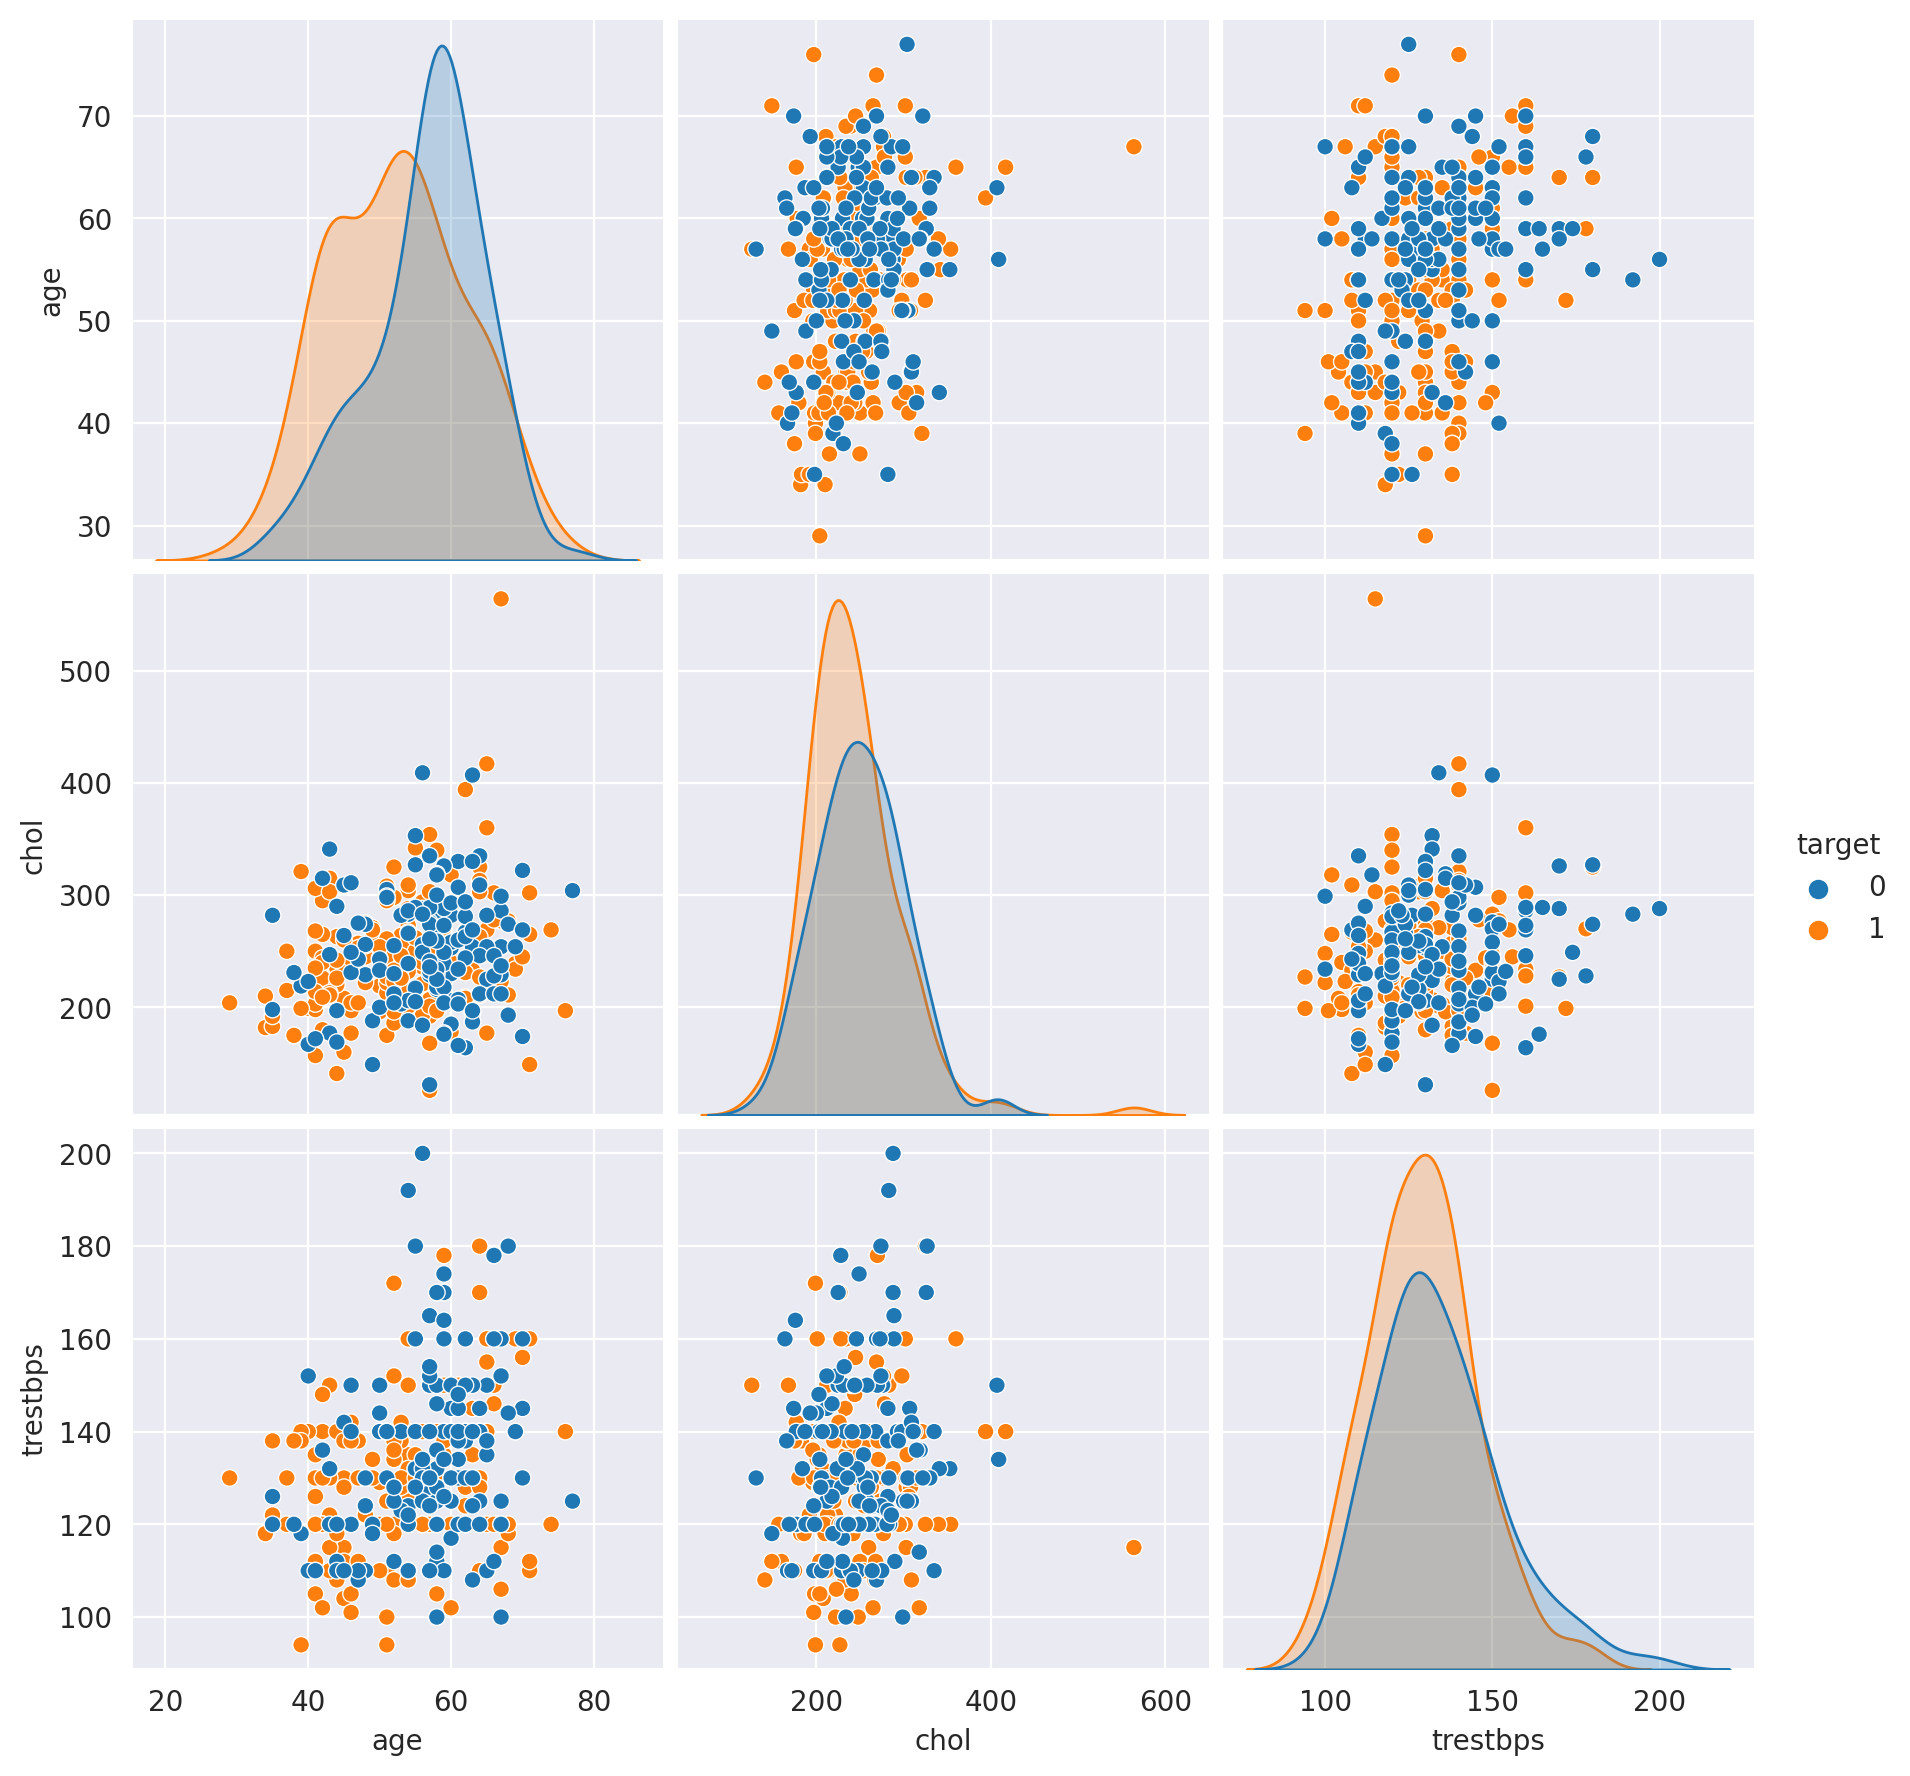

In [15]:
sns.pairplot(df[['age','chol','trestbps',"target"]],hue="target",  height=3)

**Heatmap**

<AxesSubplot:>

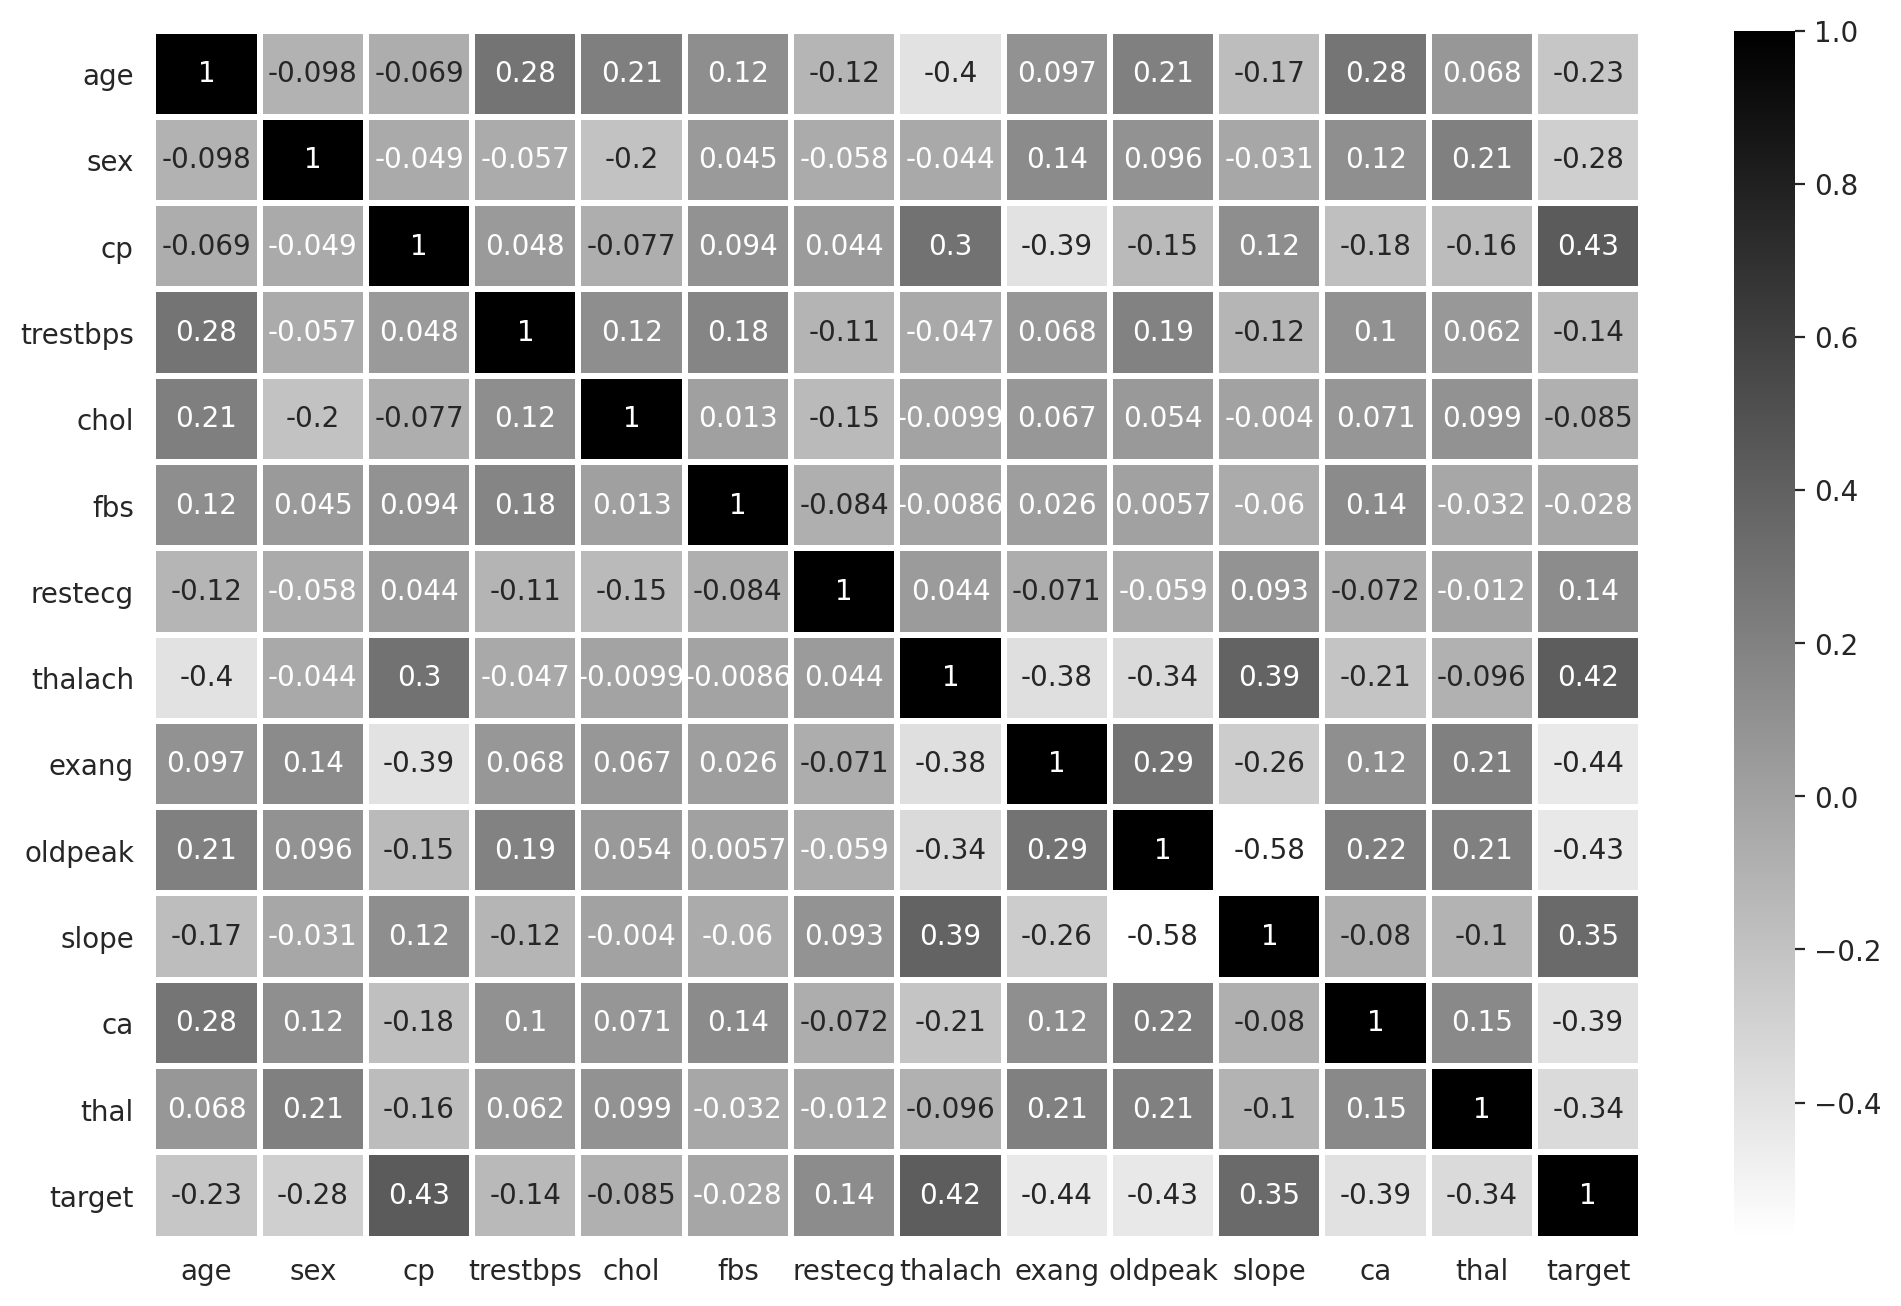

In [16]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='gist_yarg', linewidths = 2)

# Getting ready for ML models

In [17]:
X = df.drop("target",axis=1,  inplace=False)
y = df["target"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
stan_scaler = StandardScaler()
X_train = stan_scaler.fit_transform(X_train)
X_test = stan_scaler.transform(X_test)

# ML models 
> I'm using a couple reggression , classification models and of course Kaggle's favorite model: XGB (Extreme Gradient Boost). Not using NN this time because the dataset is too small and the task seems fairly easy to handle with simpler models.

In [19]:
def report(model_predict, model_acc):
    print("Model accuracy:" ,model_acc*100,"%" )
    print("\n", classification_report(y_test, model_predict.round()))

In [20]:
#Our vanilla Linear Regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_predict = lin_reg.predict(X_test)
lin_reg_acc = accuracy_score(y_test, lin_reg_predict.round())
report(lin_reg_predict, lin_reg_acc)

Model accuracy: 86.88524590163934 %

               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [21]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
knc_predict = knc.predict(X_test)
knc_acc = accuracy_score(y_test, knc_predict)
report(knc_predict, knc_acc)

Model accuracy: 90.1639344262295 %

               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=15, max_depth=5, random_state=42)
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, rfc_predict)
report(rfc_predict, rfc_acc)

Model accuracy: 88.52459016393442 %

               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [23]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=3, learning_rate=0.1,objective="binary:logistic", n_estimators=15)
xgb.fit(X_train, y_train)
xgb_predict = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_predict)
report(xgb_predict, xgb_acc)

[05:22:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model accuracy: 85.24590163934425 %

               precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [24]:
print("Linear Regression model has a accuracy score of: {x:.5f}% \n".format(x=(lin_reg_acc*100)))
print("KNeighbors model has a accuracy score of: {x:.5f}%\n".format(x=(knc_acc*100)))
print("RandomForest model has a accuracy score of: {x:.5f}%\n".format(x=(rfc_acc*100)))
print("Extreme Gradient Boost model has a accuracy score of: {x:.5f}%".format(x=(xgb_acc*100)))

Linear Regression model has a accuracy score of: 86.88525% 

KNeighbors model has a accuracy score of: 90.16393%

RandomForest model has a accuracy score of: 88.52459%

Extreme Gradient Boost model has a accuracy score of: 85.24590%


# K nearest neighbors wins with 90% acc

> I plan on revisiting this small project to polish the data visualization and models hyperparamenter.

> Any feed back is appreciated!

> Have a great day.